# Model Project: **Consumers Problem**

In [34]:
# We start by importing the relevant packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
import sympy as sm

For this assignment we consider a Micro Economics I problem with inspiration from the Winter 2016 exam (excercise 2) from the University of Copenhagen.

## Visualization of the Consumers Utility

The problem considers the consumer's utility of two goods:

\\[ u(x_1,x_2) = x_1 x_2 + 2 x_2 \\]

The consumption-possibility frontier is \\[(x_1,x_2) \in (0,\infty)\times(0,\infty)\\] Also, we assume that \\[p_1,p_2,I>0\\]

Firstly we visualize the consumer's utility

In [35]:
# We define the utility function
def u(x1,x2):
    u = x1*x2 + 2 * x2
    return u

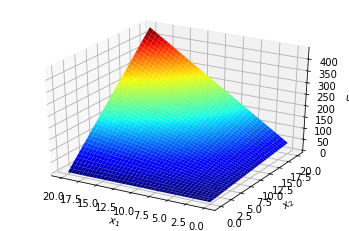

In [36]:
# We construct 2 vectors, x1 and x2, within the interval 0 to 10.
x1_vec = np.linspace(0,20,40)
x2_vec = np.linspace(0,20,40)

# We then construct a grid of the two vectors constructed above.
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec)

# Within this grid we consider the utility function
u_grid=u(x1_grid,x2_grid)

# We plot the graph 3d
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_grid,x2_grid,u_grid, cmap=plt.cm.jet, cstride=1, rstride=1)

# Then we add labels and invert the axes
ax.set_xlabel('$x_1$')

ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')
ax.invert_xaxis()

## Solving the Consumer's Utility Maximization Problem

We consider the following utility maximization problem: 

\\[ 
\begin{eqnarray*}
\max_{x_{1},x_{2}} x_{1} x_{2} + 2 x_{2}\ \text{u.b.}\ p_{1} x_{1} + p_{2} x_{2} = I
\end{eqnarray*}
\\]  

We define our utility and budget constraint in terms of sympy such that we can computate symbolic expressions with the variables in question.

In [37]:
# Converting the variables into symbolic expression
x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
I  = sm.symbols('I')
U = sm.symbols('U')

# Construction the utility function and budget constraint in terms of symbolic expressions
utility = sm.Eq(x1*x2 + 2*x2, U)
budget_constraint = sm.Eq(p1*x1 + p2*x2, I)

We wish to find the consumers demand for $x_1$ and $x_2$ respectivly. First we isolate $x_2$

In [38]:
# Isolate x2 withinthe budget constraint
x2constraint = sm.solve(budget_constraint, x2)

\\[x_2 = \frac{I - p_1 x_1}{p_2}\\]

Then we substitute our result for $x_2$ into the the utility function

In [39]:
utility_subx2 = utility.subs(x2, x2constraint[0])


\\[u =  \frac{x_1(I - p_1 x_1)}{p_2} + \frac{2(I - p_1 x_1)}{p_2}\\]

Now we are able to maximize this equation by finding the deriviate with respect to $x_1$

In [40]:
focx1 = sm.diff(utility_subx2, x1)

\\[\text{FOC(1) = } -\frac{p_1 x_1}{p_2} - \frac{2 p_1}{p_2} + \frac{I - p_1 x_1}{p_2}\\]

We set this equal to zero and solve for $x_1$

In [41]:
x1sol = sm.solve(sm.Eq(focx1, 0), x1)

\\[x_1 = \frac{I - 2 p_1}{2 p_1}\\]

We substitute the result above for $x_1$ into our budget constraint expressed as a function for $x_2$

In [42]:
x1constraint = sm.solve(budget_constraint, x1)
utility_subx1 = utility.subs(x1, x1constraint[0])
focx2 = sm.diff(utility_subx1, x2)
x2sol = sm.solve(sm.Eq(focx2, 0), x2)

\\[x_2 = \frac{I + 2 p_1}{2 p_2}\\]

Note: The above solutions are applicable for $I > 2p_1$. We choose to disregard the corner solutions in the situation where $ I \leq 2p_1$.

## A Specific Case

We let prices $p_1 = 4$ and $p_2 = 1$ and $I = 16$. Due to a change in circumstances for the production of the two goods, a fall in the price of good 1 falls to $p_1 = 1$

In [43]:
# We define the result above for x1 and x2 in terms of functions instead of symbolic expressions

def x2func(p1,p2,I):
    return (I/2 + p1)/p2

def x1func(p1,p2,I):
    return (I/2 - p1)/p1

In [44]:
# We consider x1 and x2 for the case of p1=4, p2=1 and I=16
print('x2 =',x2func(4,1,16))
print('x1 =',x1func(4,1,16))
print('utility =', u(x1func(4,1,16),x2func(4,1,16)))

x2 = 12.0
x1 = 1.0
utility = 36.0


In [45]:
# We then consider x1 and x2 for the case of p1=1, p2=1 and I=16
print('x2 =',x2func(1,1,16))
print('x1 =',x1func(1,1,16))
print('utility =', u(x1func(1,1,16),x2func(1,1,16)))

x2 = 9.0
x1 = 7.0
utility = 81.0


**We show the results graphically**

In [46]:
# We isolate x2 in the utility function and budget constraint such that we are able to plot it in the same graph
print('x2 =', sm.solve(budget_constraint, x2))
print('x2 =', sm.solve(utility, x2))

x2 = [(I - p_1*x_1)/p_2]
x2 = [U/(x_1 + 2)]


$x_2^{budget} = \frac{I - p_1 x_1}{p_2} $ <br/>
$x_2^{utility} = \frac{U}{x_1 + 2} $

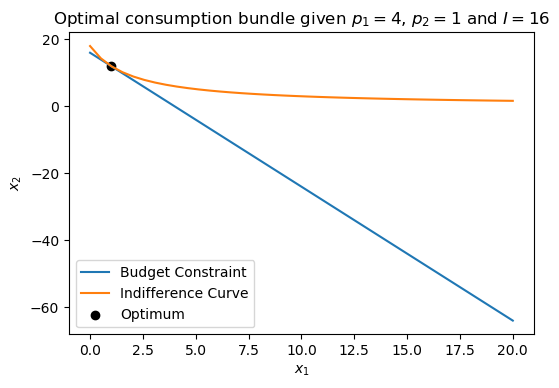

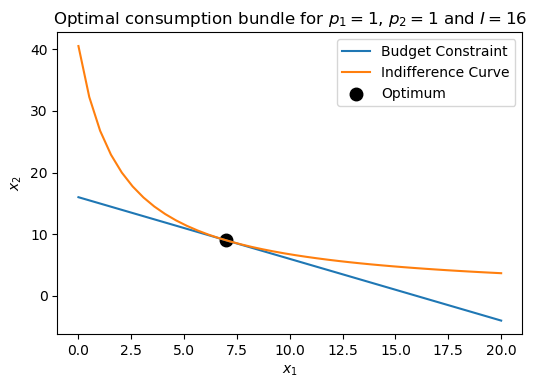

In [47]:
# We define the indifference curve and budget constraint in terms of x2 by functions such that we can plot these
def budget(x1,I,p1,p2):
    return (I-p1*x1)/p2

def indiff(x1,u,p1,p2):
    return u/(x1+2)

# We plot the indifference curve, budget constraint and optimum for p1=4
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,budget(x1_vec,16,4,1),label='Budget Constraint') 
ax.plot(x1_vec,indiff(x1_vec,36,4,1),label='Indifference Curve')
ax.scatter(x1func(4,1,16),x2func(4,1,16),u(x1func(4,1,16),x2func(4,1,16)),color='black',label='Optimum')

# We add labels and a title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.title('Optimal consumption bundle given $p_1 = 4$, $p_2 = 1$ and $I = 16$')
ax.legend();

# We plot the indifference curve, budget constraint and optimum for p1=1
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,budget(x1_vec,16,1,1),label='Budget Constraint')
ax.plot(x1_vec,indiff(x1_vec,81,1,1),label='Indifference Curve')
ax.scatter(x1func(1,1,16),x2func(1,1,16),u(x1func(1,1,16),x2func(1,1,16)),color='black',label='Optimum')

# We add labels and a title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.title('Optimal consumption bundle for $p_1=1$, $p_2 = 1$ and $I = 16$')
ax.legend();

## Interactive Solution

To visualize the optimal consumption bundle in terms of difference prices and incomes, we plot an interactive chart, where budget constraint, indifference curve and optimum depend on prices and incomes.

In [54]:
# We define the plot in terms of a function to be able to use a slider to change the independent variables
def _figure(x1_vec, I, p2, p1):
    fig=plt.figure(dpi=60)
    ax = fig.add_subplot(1, 1, 1)
    x1_vec = np.linspace(0, 2*x1func(p1, p2, I), 40)
    x2_vec = np.linspace(0, 2*x2func(p1, p2, I), 40)
    ax.plot(x1_vec,budget(x1_vec,I,p1,p2),label="Budget Constraint")
    x1 = x1func(p1,p2,I) # We define x1 as a function in terms of the independent varibles
    x2 = x2func(p1,p2,I) # We define x2 as a function in terms of the independent varibles   
    
    # Given the definitions of x1 and x2, we are now able to define the utility function in terms of the independent varibles
    u_plot = x1*x2 + 2*x2 
    ax.plot(x1_vec,indiff(x1_vec,u_plot,p1,p2),label="Indifference Curve in optimum")
    ax.plot(x1_vec,indiff(x1_vec,u_plot*0.5,p1,p2),label="Indifference Curve x0.5")
    ax.plot(x1_vec,indiff(x1_vec,u_plot*1.5,p1,p2),label="Indifference Curve x1.5")
    ax.scatter(x1,x2,color='black',label='Optimum')
    plt.title('Optimal Consumption Bundle')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.legend();
    plt.grid(which = 'both')

# Then we plot the sliders of p1, p2 and I
import ipywidgets as widgets
widgets.interact(_figure, 
                x1_vec = widgets.fixed(x1_vec), 
                I = widgets.FloatSlider(description="$I$", min=0.1, max=100, step=0.01, value=32),
                p2 = widgets.FloatSlider(description="$p_2$", min=0.01, max=20, step=0.01, value=2),
                p1 = widgets.FloatSlider(description="$p_1$", min=0.01, max=20, step=0.01, value=2));

interactive(children=(FloatSlider(value=32.0, description='$I$', min=0.1, step=0.01), FloatSlider(value=2.0, d…

We notice that when $I \leq 2p_1$, the optimal consumption bundle impossibly requires a negative value for $x_1$ confirming the existence of a corner solution.

## Alternative Solution by Numerical Analysis

Above we chose to solve the problem symbolically using sympy, but we could also have chosen to solve it numerically using scipy. We perform the numerical analysis below to answer the same problem.

In [17]:
# We find the optimal consumption bundle for the following values
I = 16
p1 = 1
p2 = 1

# We redefine our utility function
def u_new(x1,x2):
    return x1*x2 + 2 * x2

# We define our indifference curve with a negative sign to use a minimizer to maximize utility
def func(x1,I,p1,p2):
    x2 = (I-p1*x1)/p2
    return -u_new(x1,x2)

# We call the scipy solver
solution = optimize.minimize_scalar(
    func,method='bounded',
    bounds=(0,I/p2),args=(I,p1,p2))


# We unpack the solution
x1 = solution.x
x2 = (I-p1*x1)/p2
u_func = u_new(x1,x2)

# Then we print our solution for p1=1, p2=1 and I=16
print(f'x1 = {x1:.1f}')
print(f'x2 = {x2:.1f}')
print(f'u  = {u_func:.1f}')
print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:.2f}') 

x1 = 7.0
x2 = 9.0
u  = 81.0
I-p1*x1-p2*x2 = 0.00


By this we conclude that the same result is found by numerical analysis as found by the analysis performed earlier:

In [18]:
print('x2 =',x2func(1,1,16))
print('x1 =',x1func(1,1,16))
print('u =', u(x1func(1,1,16),x2func(1,1,16)))
print('I-p1*x1-p2*x2 =',16-1*x1func(1,1,16)-1*x2func(1,1,16))

x2 = 9.0
x1 = 7.0
u = 81.0
I-p1*x1-p2*x2 = 0.0


We thus show that consumption amounts given the prices utilises the entire income.